In [1]:
import pandas as pd 
import numpy as np 
from scipy.signal import butter, filtfilt, iirnotch
import scipy.signal as signal
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [2]:
test_file= '../signal-processing/openbci-data/olivia-test/BrainFlow-RAW_2023-02-24_18-11-24_T3_10_1.csv'

df = pd.read_table(test_file, header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,106.0,1086.205374,187500.0,187500.0,187500.0,187500.0,-187500.022352,187500.0,187500.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677283e+09,0.0
1,107.0,1902.781654,187500.0,187500.0,187500.0,187500.0,-187500.022352,187500.0,187500.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677283e+09,0.0
2,108.0,2298.005199,187500.0,187500.0,187500.0,187500.0,-187500.022352,187500.0,187500.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677283e+09,0.0
3,109.0,1500.539661,187500.0,187500.0,187500.0,187500.0,-187500.022352,187500.0,187500.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677283e+09,0.0
4,110.0,1014.523329,187500.0,187500.0,187500.0,187500.0,-187500.022352,187500.0,187500.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677283e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,186.0,2371.810659,187500.0,187500.0,187500.0,187500.0,-187500.022352,187500.0,187500.0,0.044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677283e+09,0.0
3126,187.0,2104.506147,187500.0,187500.0,187500.0,187500.0,-187500.022352,187500.0,187500.0,0.044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677283e+09,0.0
3127,188.0,1331.292252,187500.0,187500.0,187500.0,187500.0,-187500.022352,187500.0,187500.0,0.044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677283e+09,0.0
3128,189.0,1492.113053,187500.0,187500.0,187500.0,187500.0,-187500.022352,187500.0,187500.0,0.044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677283e+09,0.0


In [4]:
data = df[1][200:]

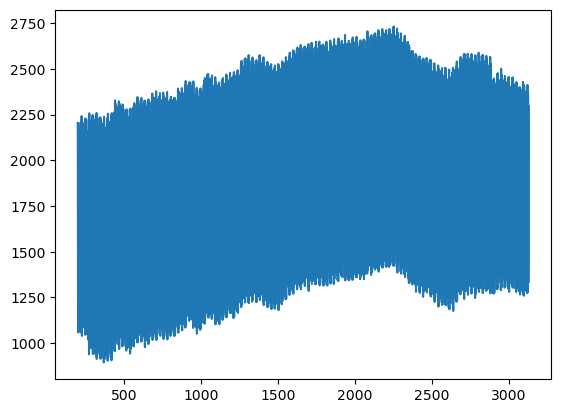

In [5]:
plt.plot(data)

## Filtering

- DC offset filtering: https://stackoverflow.com/questions/20948111/how-can-i-remove-a-wandering-dc-offset-from-an-audio-clip


In [6]:
def filter_data(data, fs=250, notch_f0 = 60, Q = 100):
  nyq = 0.5*fs
  order = 4

  # y = [i+187500.022352 for i in data] ## minus constant dc drift
  
  # remove dc offset 
  b,a = butter(2, 1/nyq, 'highpass')
  y = filtfilt(b,a,data)

  # b,a = butter(2, 250/nyq, 'lowpass')
  # y = filtfilt(b,a,y)

  # bandpass_filter=[5,125] # --> need to define the last digit as below 125 (250/2)
  # bandpass_filter = [i/nyq for i in bandpass_filter]
  # b, a = butter(order, bandpass_filter, fs=fs, btype = 'bandpass')
  # y = filtfilt(b, a, data)


  b_notch, a_notch = iirnotch(notch_f0, Q, fs)
  y = filtfilt(b_notch, a_notch, y)

  return y

In [7]:
y = filter_data(data, Q=100)

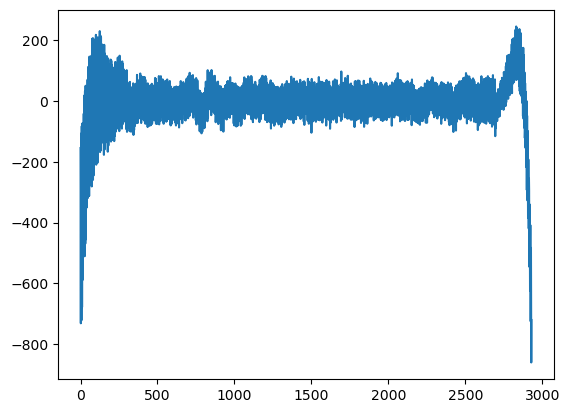

In [8]:
plt.plot(y)

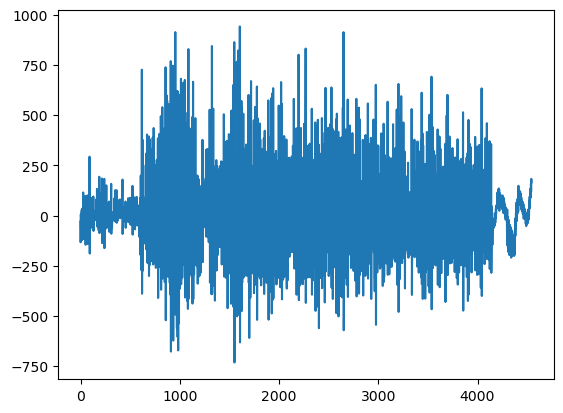

In [9]:
plt.plot(y)

In [10]:
# rectify EMG signal
absSignal = np.absolute(y)
timeAbs=np.linspace(0, len(absSignal)/250, num=len(absSignal))

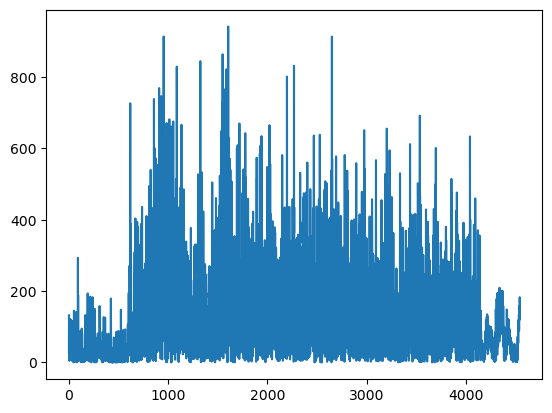

In [11]:
plt.plot(absSignal)

In [12]:
from src.analyze.emg_processing import analyzeEMG
# result_dict = analyzeEMG(y, 250, False)
# result_dict

In [13]:
result_dict = analyzeEMG(y, 250, False)
result_dict

/Users/jessysong/Documents/Github-Projects/CTS-early-detection/signal-processing/src/analyze/freq_descriptors.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  FR = LF / HF


{'TimeDomain': {'IEMG': 595943.6437667334,
  'MAV': 131.14956949091842,
  'MAV1': 104.5662748872743,
  'MAV2': 79.45411464322687,
  'SSI': 153891305.08359426,
  'VAR': 33874.37928320366,
  'TM3': 3850169.641550314,
  'TM4': 5997532132.80757,
  'TM5': 2027195541219.37,
  'LOG': 9.068476541422944e+56,
  'RMS': 184.02968383997649,
  'WL': 665468.6924950129,
  'AAC': 146.44997634133207,
  'DASDV': 45722.04574070431,
  'AFB': -0.07305585690138491,
  'ZC': 1535,
  'MYOP': 1.0,
  'WAMP': 2007,
  'SSC': 1092},
 'FrequencyDomain': {'MNF': 47.526042067703656,
  'MDF': 43.9453125,
  'PeakFrequency': 36.1328125,
  'MNP': 409.0161137636726,
  'TTP': 52763.078675513796,
  'SM1': 2507620.2967540263,
  'SM2': 1477027394.5366888,
  'SM3': 1202319656710.2722,
  'FR': inf,
  'PSR': 0.6392854962662955,
  'VCF': 25734.85400982635}}

In [14]:
df_td = pd.DataFrame(result_dict['TimeDomain'], index=[0])
df_td

,IEMG,MAV,MAV1,MAV2,SSI,VAR,TM3,TM4,TM5,LOG,RMS,WL,AAC,DASDV,AFB,ZC,MYOP,WAMP,SSC
0,595943.643767,131.149569,104.566275,79.454115,1.538913e+08,33874.379283,3.850170e+06,5.997532e+09,2.027196e+12,9.068477e+56,184.029684,665468.692495,146.449976,45722.045741,-0.073056,1535,1.0,2007,1092


In [157]:
df_fd = pd.DataFrame(result_dict['FrequencyDomain'], index=[0])
df_fd

,MNF,MDF,PeakFrequency,MNP,TTP,SM1,SM2,SM3,FR,PSR,VCF
0,55.796258,52.734375,44.921875,1104.49141,142479.391907,7.949817e+06,1.285355e+10,2.773705e+13,inf,0.575015,87100.194493


## Get DataFrame results for all files

In [496]:
import os 

data_dir = './openbci-data/raw/10-100MVC-stashuk-t1-3/'

In [497]:
save_dir = './openbci-data/results/'
save_tdfile = 'td_stashuk_1-3.csv'
save_fdfile = 'fd_stashuk_1-3.csv'

pics_dir = './openbci-data/pics-stashuk/'

In [498]:
def filter_data(data, fs=250, notch_f0 = 60, Q = 100):
  nyq = 0.5*fs
  order = 4

  # y = [i+187500.022352 for i in data] ## minus constant dc drift
  
  # remove dc offset 
  b,a = butter(2, 1/nyq, 'highpass')
  y = filtfilt(b,a,data)

  # bandpass_filter=[1,120] --> need to define the last digit as below 125 (250/2)
  # bandpass_filter = [i for i in bandpass_filter]
  # b, a = butter(order, bandpass_filter, fs=fs, btype = 'bandpass')
  # y = filtfilt(b, a, data)

  b_notch, a_notch = iirnotch(notch_f0, Q, fs) ## power line interference
  y = filtfilt(b_notch, a_notch, y)

  return y

In [499]:
import warnings
warnings.filterwarnings('ignore')
import os 
for subdir, dirs, files in os.walk(data_dir):
    counter = 0
    for file in files: 
        if os.path.join(subdir, file).endswith('csv'): 
            df = pd.read_table(subdir+file, header=None)
            data = df[1][250:-250] ## first 5 and last 5 seconds excluded
            # range_l = int(len(data)*0.25)
            middle_ind = int((len(data) - 1)/2)
            # print(middle_ind)
            # range_h = int(len(data)*0.75)
            data = data[middle_ind-250:middle_ind+250] ## then only take middle 3 secs for processing
            y = filter_data(data)
            # plt.plot(y)
            # y = data.tolist()
            result_dict = analyzeEMG(y, 250, False)
            df_td = pd.DataFrame(result_dict['TimeDomain'], index=[0])
            df_fd = pd.DataFrame(result_dict['FrequencyDomain'], index=[0])
            df_td['File'] = file[:-4]
            df_fd['File'] = file[:-4]
            plt.plot(y)
            plt.savefig(pics_dir+file[:-3])
            plt.close()
            if counter == 0: 
                df_td.to_csv((save_dir+save_tdfile), index=False, mode='a');
                df_fd.to_csv((save_dir+save_fdfile), index=False, mode='a');
            else: 
                df_td.to_csv((save_dir+save_tdfile), index=False, header=False, mode='a');
                df_fd.to_csv((save_dir+save_fdfile), index=False, header=False, mode='a');
        counter += 1

## Read full processed results

In [502]:
df_tdres = pd.read_csv('./openbci-data/results/td_1-5.csv')
df_tdres.sort_values('File', inplace=True) 
df_tdres.to_csv('./openbci-data/results/td_1-5.csv', index=False)

In [500]:
df_tdres_stashuk = pd.read_csv('./openbci-data/results/td_stashuk_1-3.csv')
df_tdres_stashuk.sort_values('File',inplace=True) 
df_tdres_stashuk.to_csv('./openbci-data/results/td_stashuk_1-3.csv', index=False)

In [503]:
df_fdres = pd.read_csv('./openbci-data/results/fd_1-5.csv')
df_fdres.sort_values('File',inplace=True)
df_fdres.to_csv('./openbci-data/results/fd_1-5.csv', index=False)

In [501]:
df_fdres_stashuk = pd.read_csv('./openbci-data/results/fd_stashuk_1-3.csv')
df_fdres_stashuk.sort_values('File',inplace=True)
df_fdres_stashuk.to_csv('./openbci-data/results/fd_stashuk_1-3.csv', index=False)

## Find average for each set of data 

expectation is that olivia vs. stashuk should show different patterns in stats (different growth of stats as strength increase). -> in report write about how the motor unit recruitment patterns are expected to be different

In [504]:
df_tdres = pd.read_csv('./openbci-data/results/td_1-5.csv')
df_tdres_stashuk = pd.read_csv('./openbci-data/results/td_stashuk_1-3.csv')
df_fdres = pd.read_csv('./openbci-data/results/fd_1-5.csv')
df_fdres_stashuk = pd.read_csv('./openbci-data/results/fd_stashuk_1-3.csv')

In [505]:
df_list = [df_tdres, df_tdres_stashuk, df_fdres, df_fdres_stashuk]
exp_list = ['Olivia_td', 'Stashuk_td', 'Olivia_fd', 'Stashuk_fd']

In [506]:
mvc_levels = ['000', '010', '020','050','080', '100']

In [507]:
for df in df_list: 
    for mvc in mvc_levels: 
        row_name = mvc+'-mean'
        df.loc[row_name] = df[df['File'].str.contains(mvc, na=False)].mean(numeric_only=True, axis=0,skipna=True)
        df.iloc[row_name]['File'] = row_name 

In [508]:
df_list[3]

,MNF,MDF,PeakFrequency,MNP,TTP,SM1,SM2,SM3,FR,PSR,VCF,File
0,7.944186,3.906250,0.976562,0.646669,83.420363,6.627069e+02,2.098985e+03,2.798652e+04,inf,4.332082,-37.948550,000-1
1,50.469772,45.898438,30.273438,66.136548,8531.614709,4.305886e+05,5.164502e+07,9.972881e+09,inf,0.554260,3506.172417,010-1
2,49.010814,45.898438,30.273438,99.033674,12775.343968,6.261300e+05,1.086057e+08,2.703547e+10,inf,0.539308,6099.139549,010-2
3,43.808530,59.570312,59.570312,138.067821,17810.748884,7.802627e+05,1.187861e+09,3.613046e+12,inf,0.656366,64774.279349,010-3
4,49.422484,44.921875,0.976562,205.107074,26458.812511,1.307660e+06,4.765770e+08,2.633125e+11,inf,0.148764,15569.451698,020-1
5,51.190943,42.968750,23.437500,227.523715,29350.559241,1.502483e+06,6.126559e+08,4.990550e+11,inf,0.496806,18253.224566,020-2
6,47.666352,55.664062,59.570312,201.915418,26047.088928,1.241570e+06,1.498636e+09,4.439711e+12,inf,0.597846,55263.558959,020-3
7,49.347645,46.875000,44.921875,397.335610,51256.293683,2.529377e+06,2.388850e+09,4.245676e+12,inf,0.668028,44170.795366,050-1
8,41.924645,40.039062,22.460938,516.257433,66597.208905,2.792064e+06,2.713955e+09,4.260673e+12,inf,0.492113,38994.101278,050-2
9,49.260952,50.781250,59.570312,248.808930,32096.352031,1.581097e+06,1.520053e+09,3.151833e+12,inf,0.507350,44932.404311,050-3


In [509]:
target_rows = [i+'-mean' for i in mvc_levels]
target_rows

['000-mean', '010-mean', '020-mean', '050-mean', '080-mean', '100-mean']

In [510]:
for i,df in enumerate(df_list): 
    df_means = df[df.index.isin(target_rows)]
    df_means.to_csv('./openbci-data/results/'+'means-'+exp_list[i]+'.csv', index=False)

## Graph scatter points of time domain features and frequency domain features

In [511]:
from matplotlib import pyplot as plt
%matplotlib inline

In [428]:
# target_rows_plot = target_rows[1:]

In [448]:
# target_rows_plot

In [512]:
mvc_perc = [0, 10, 20, 50, 80, 100]

In [513]:
df_tdres = pd.read_csv('./openbci-data/results/means-Olivia_td.csv')
df_tdres_stashuk = pd.read_csv('./openbci-data/results/means-Stashuk_td.csv')
df_fdres = pd.read_csv('./openbci-data/results/means-Olivia_fd.csv')
df_fdres_stashuk = pd.read_csv('./openbci-data/results/means-Stashuk_fd.csv')

df_list = [df_tdres, df_tdres_stashuk, df_fdres, df_fdres_stashuk]
exp_list = ['Olivia_td', 'Stashuk_td', 'Olivia_fd', 'Stashuk_fd']

In [459]:
# for i,df in enumerate(df_list): 
#     data = df[1:]
#     cols = data.columns.difference(['File'])
#     for col in cols: 
#         plt.figure()
#         # print(len(data[col].tolist()))
#         plt.scatter(mvc_perc, data[col].tolist()) 
#         plt.ylabel(col)
#         plt.show()

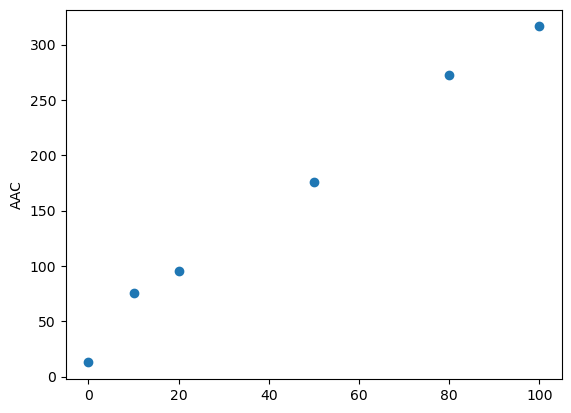

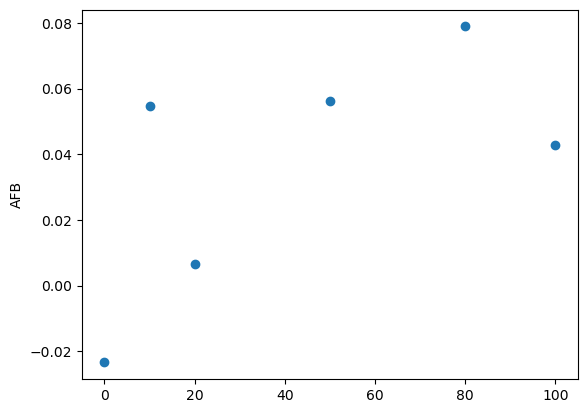

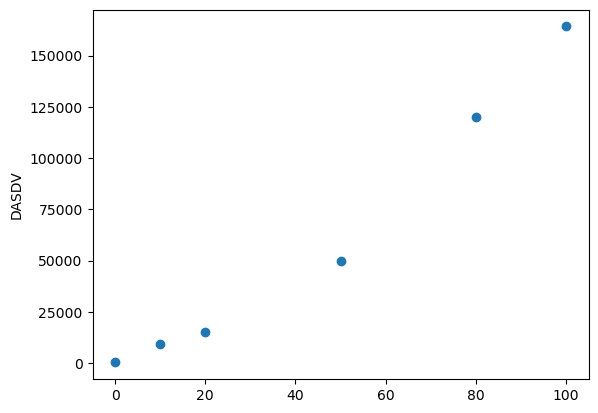

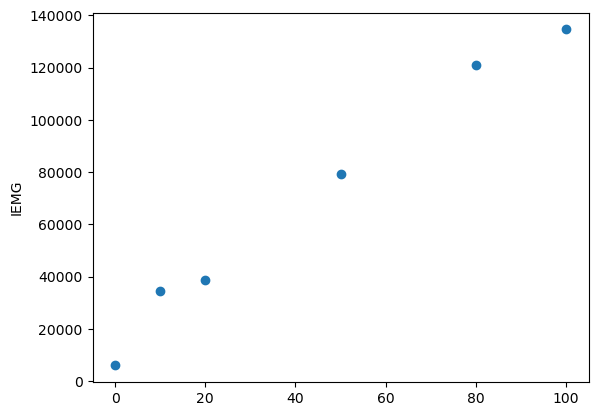

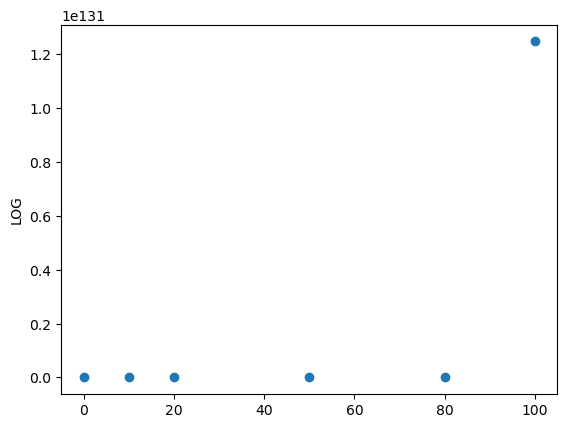

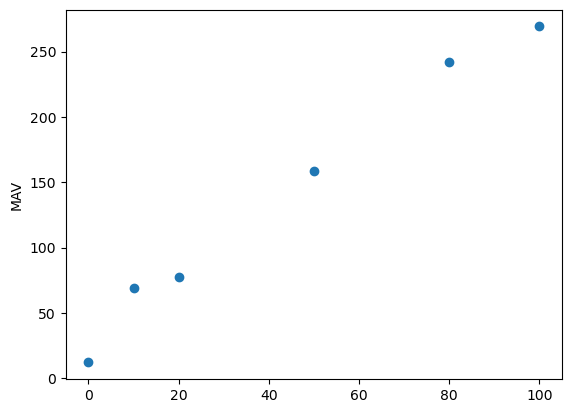

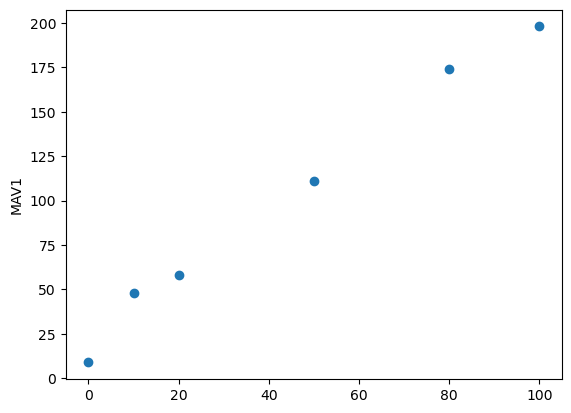

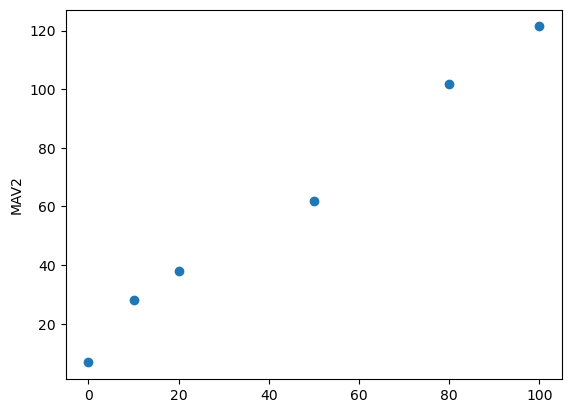

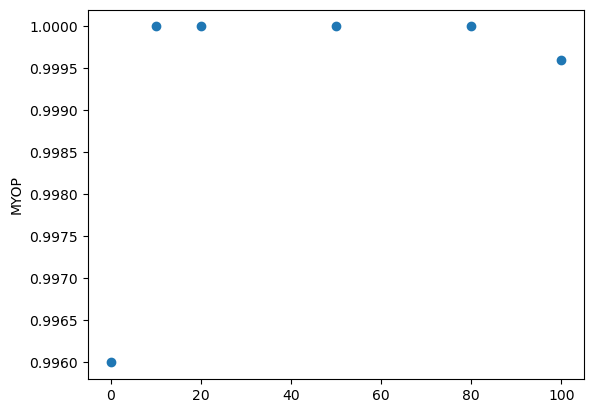

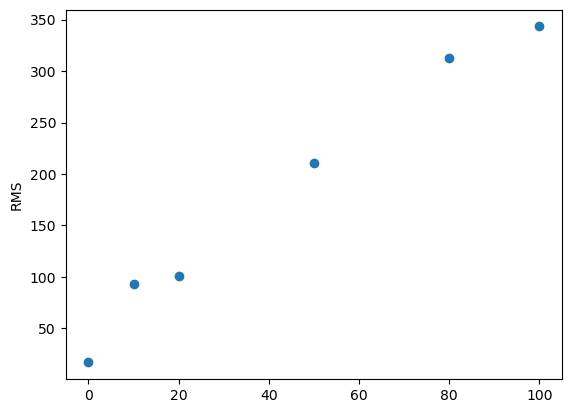

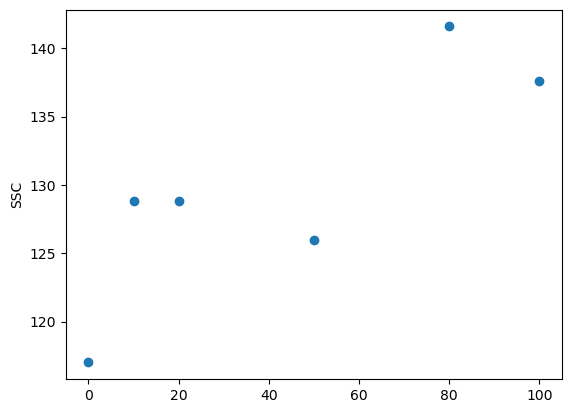

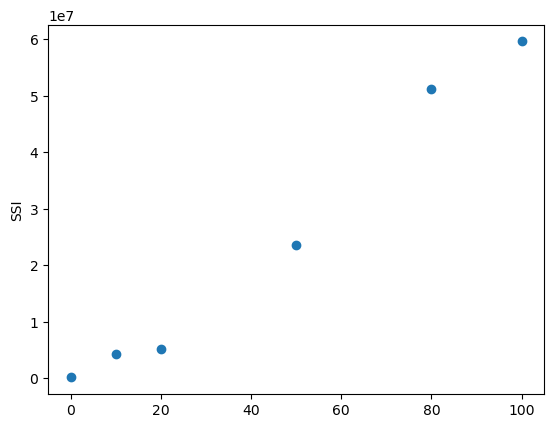

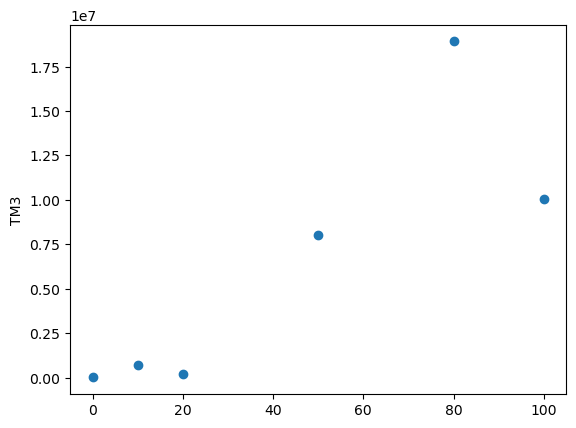

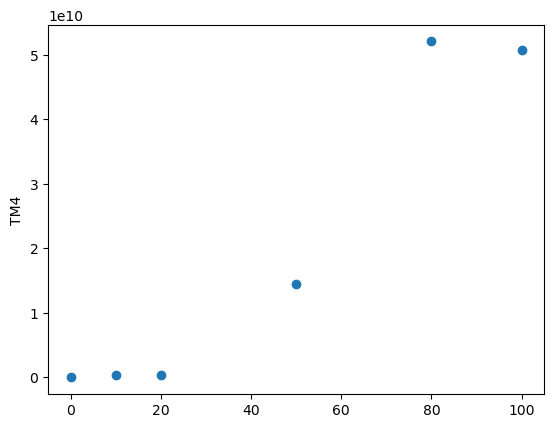

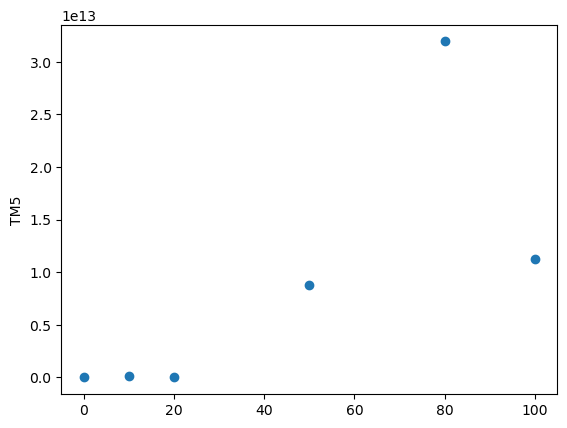

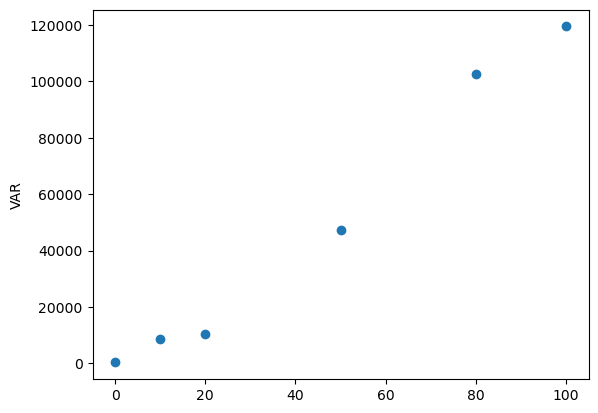

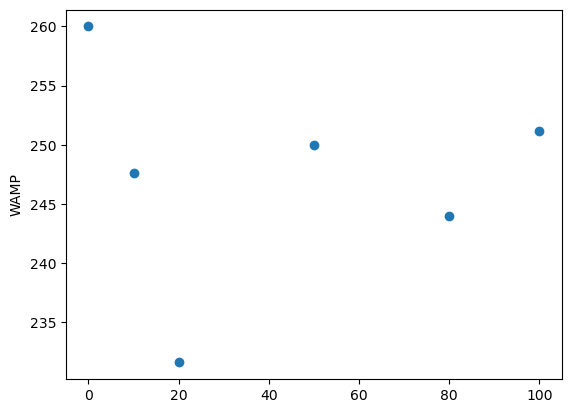

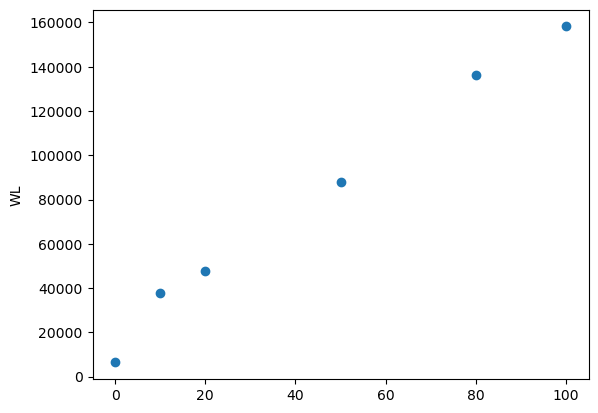

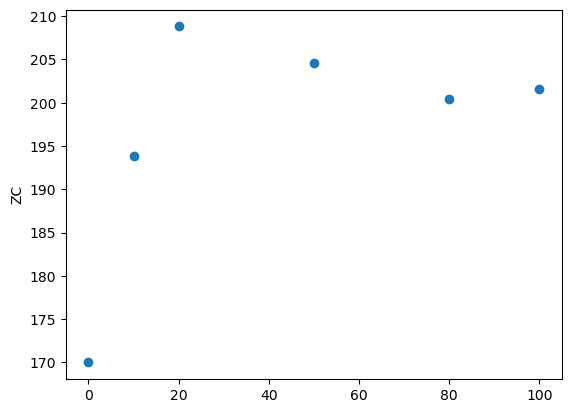

In [515]:
df = df_list[0]
data = df
cols = data.columns.difference(['File'])
for col in cols: 
    plt.figure()
    # print(len(data[col].tolist()))
    plt.scatter(mvc_perc, data[col].tolist()) 
    plt.ylabel(col)
    plt.show()

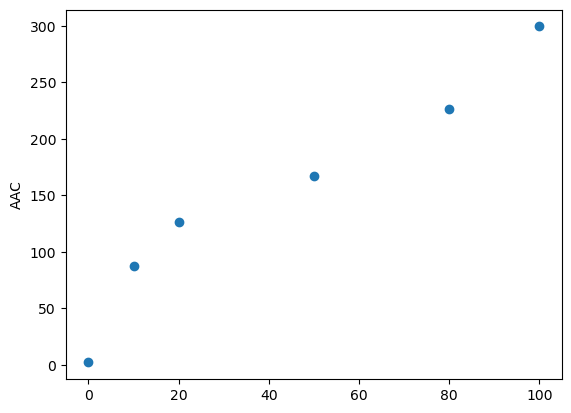

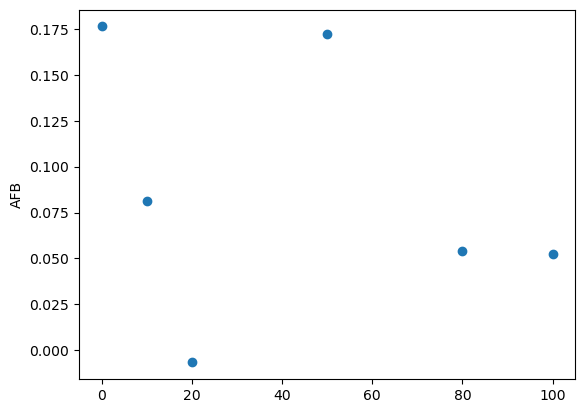

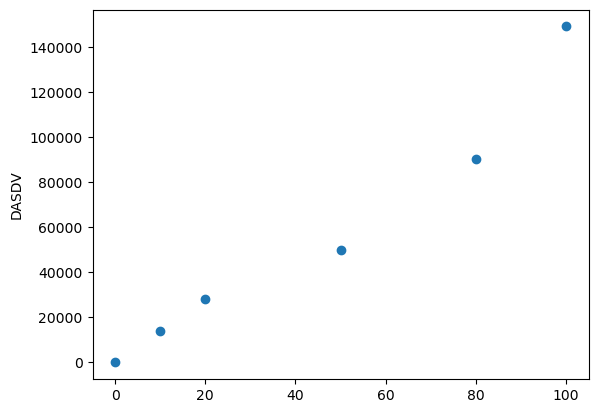

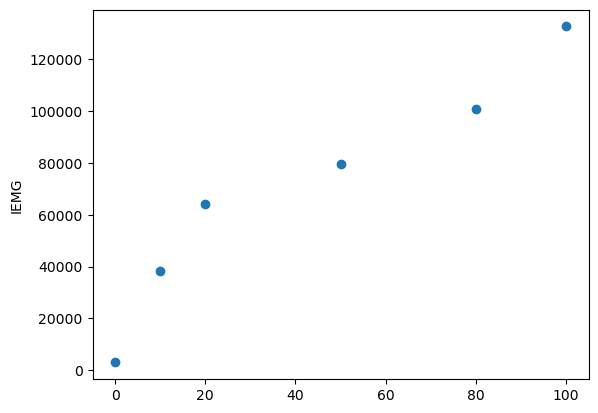

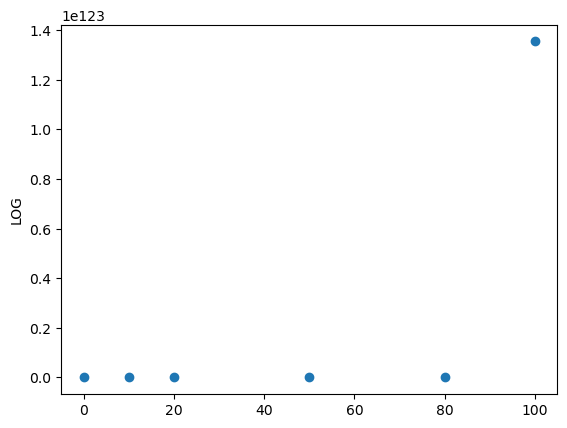

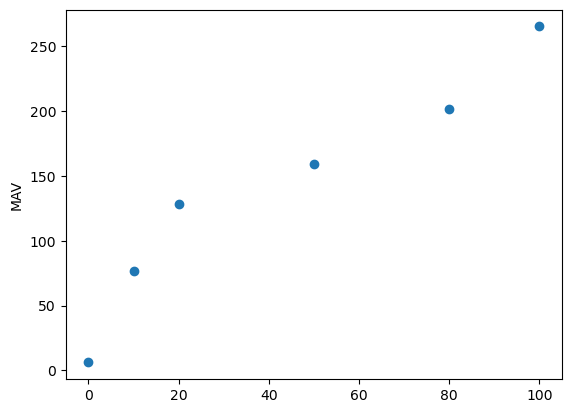

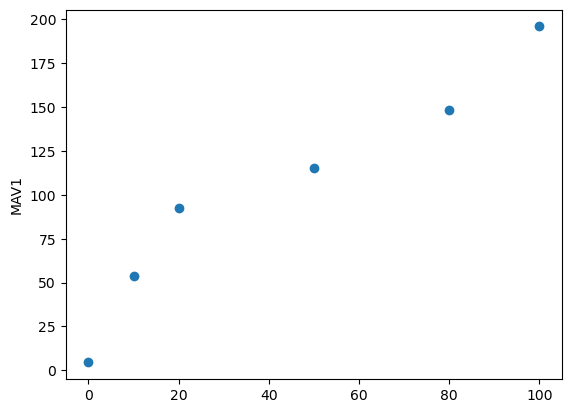

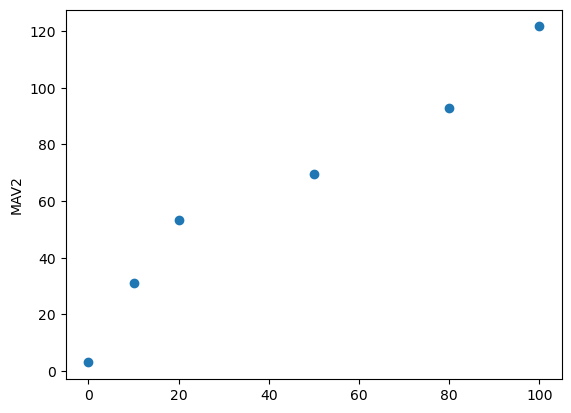

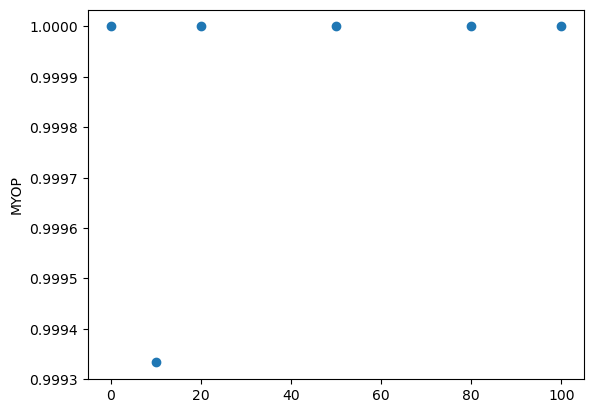

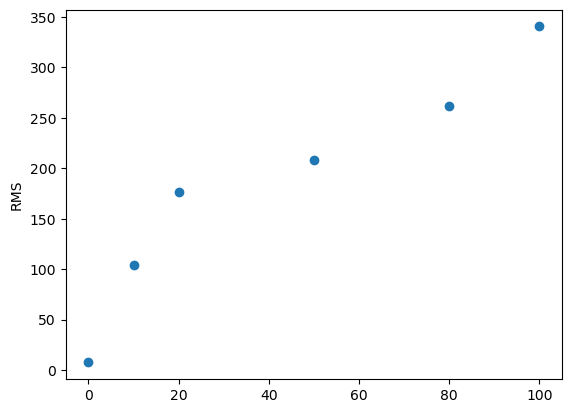

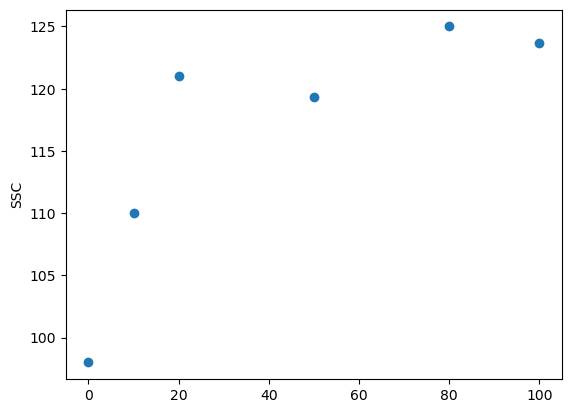

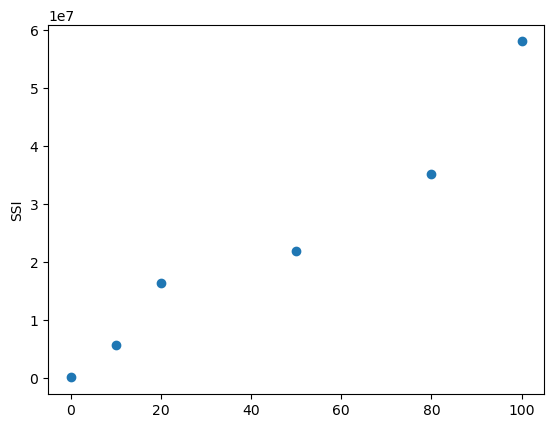

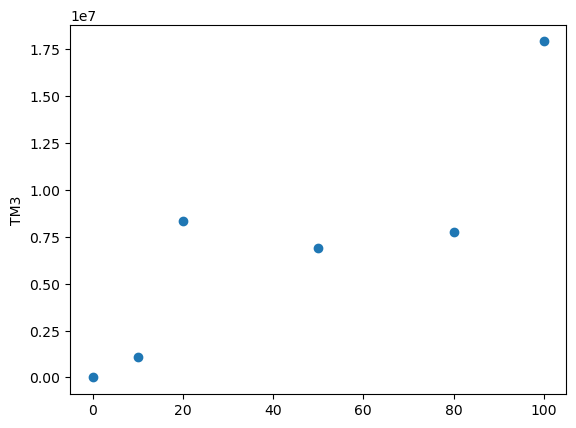

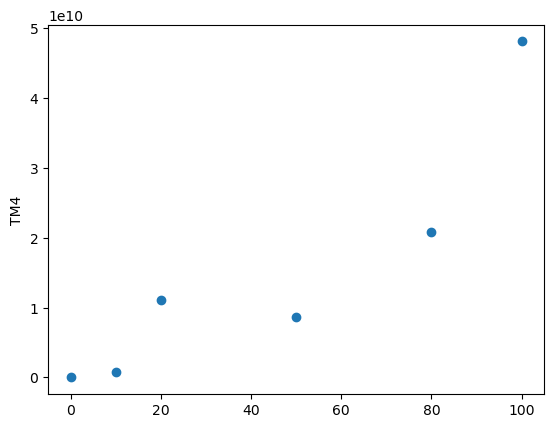

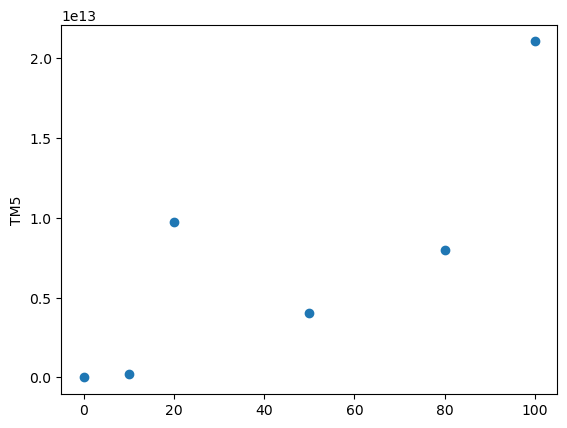

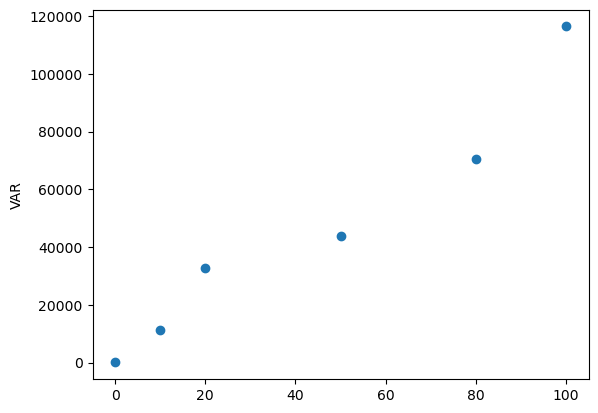

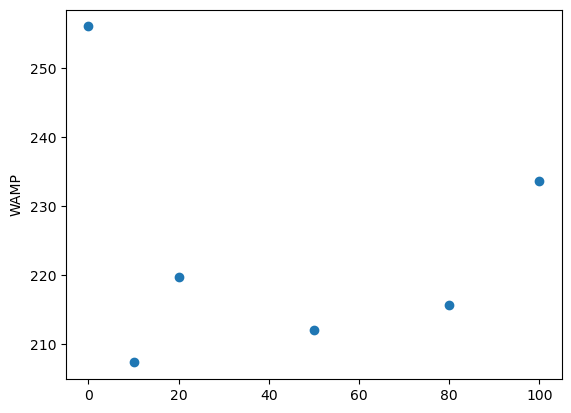

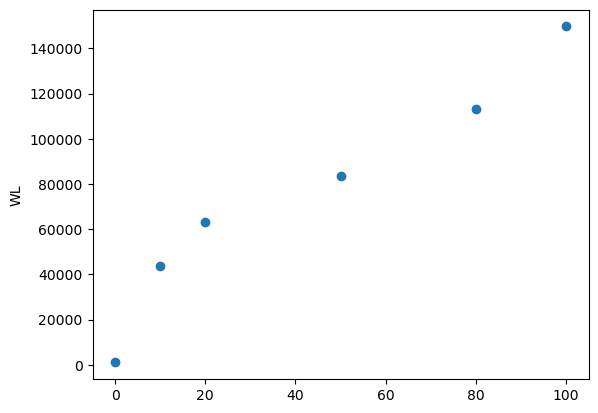

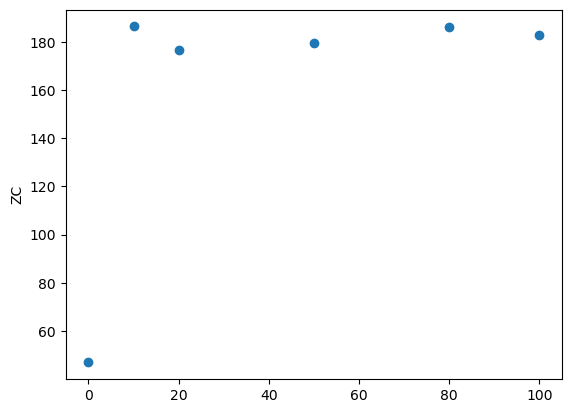

In [516]:
df = df_list[1]
data = df
cols = data.columns.difference(['File'])
for col in cols: 
    plt.figure()
    # print(len(data[col].tolist()))
    plt.scatter(mvc_perc, data[col].tolist()) 
    plt.ylabel(col)
    plt.show()

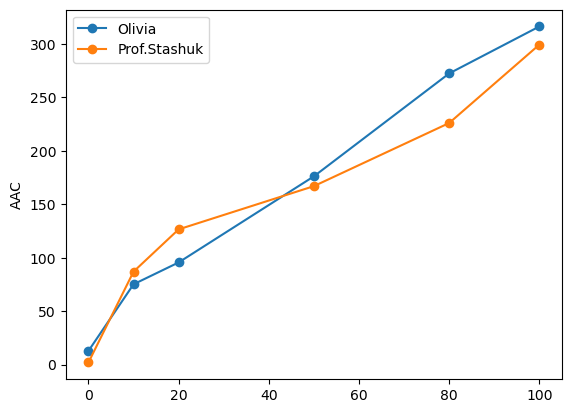

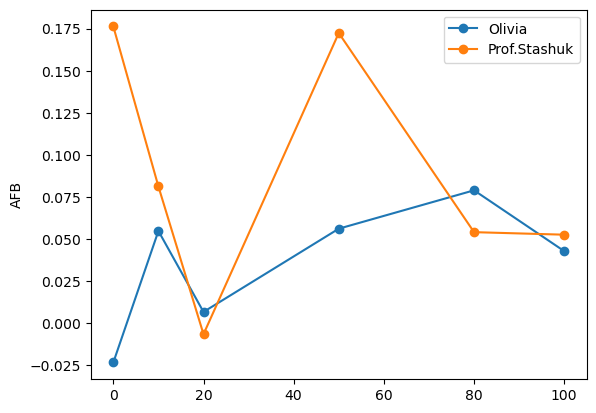

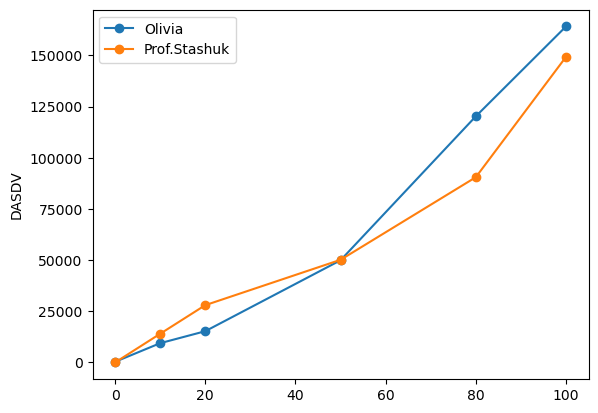

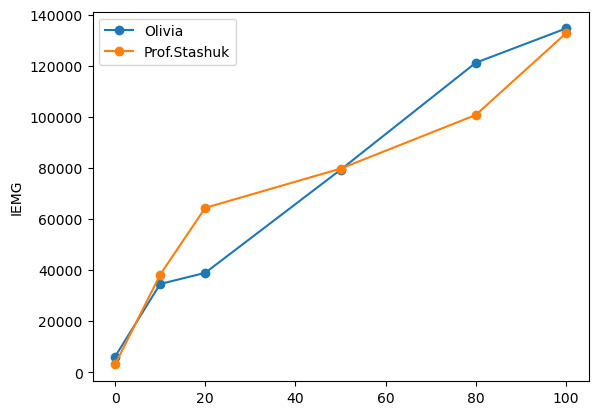

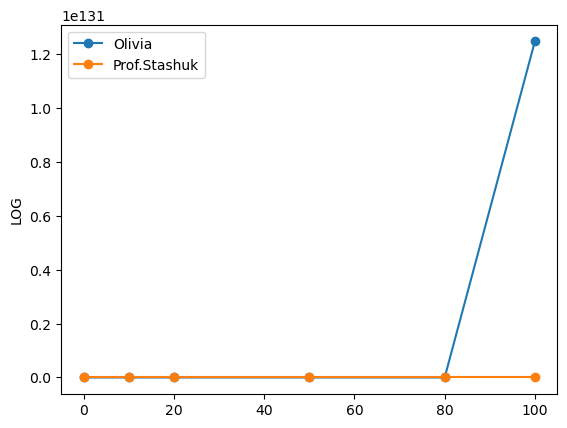

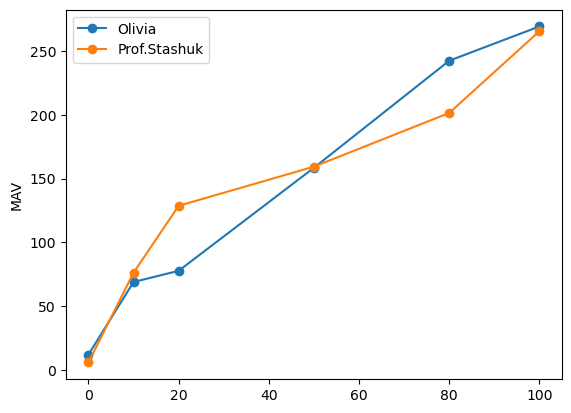

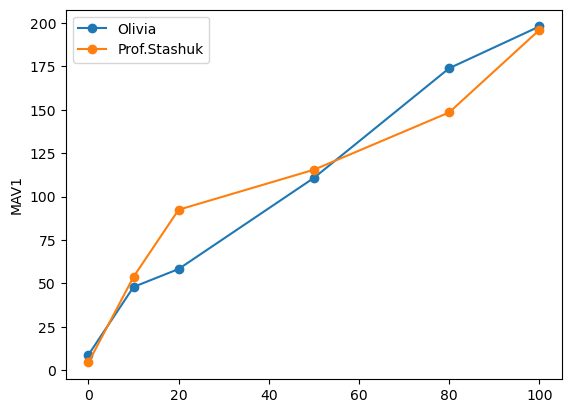

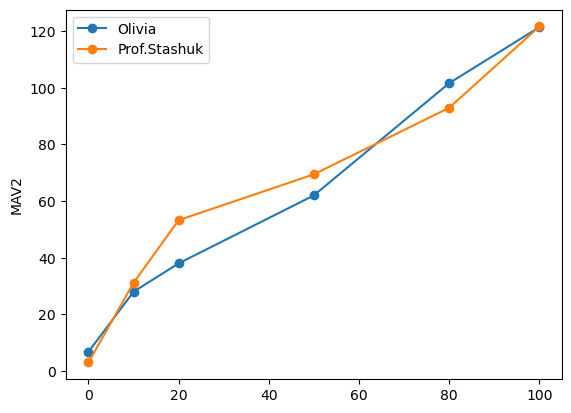

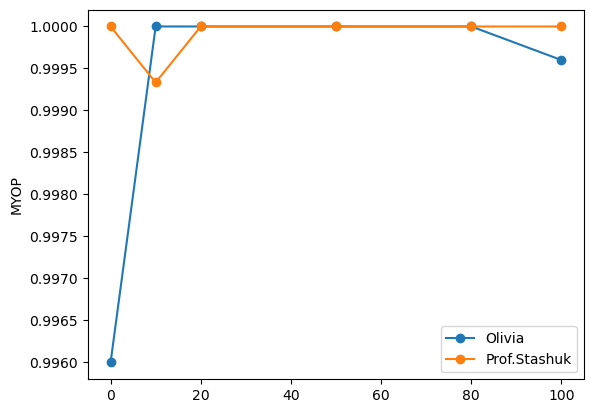

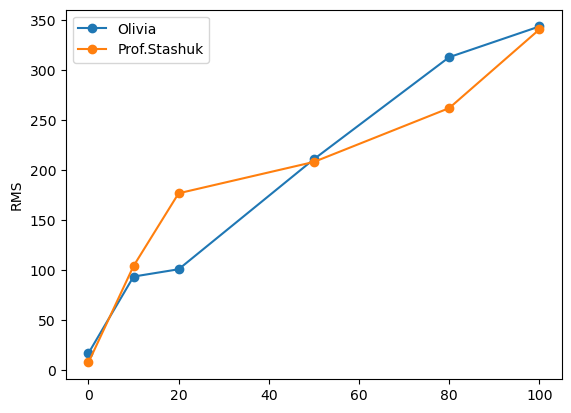

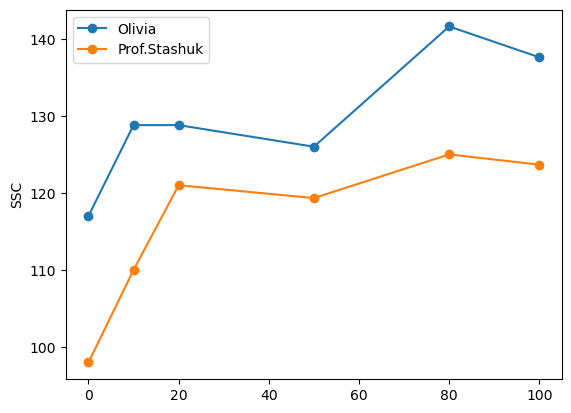

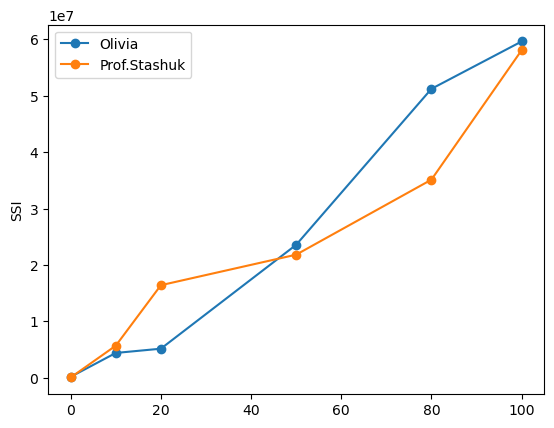

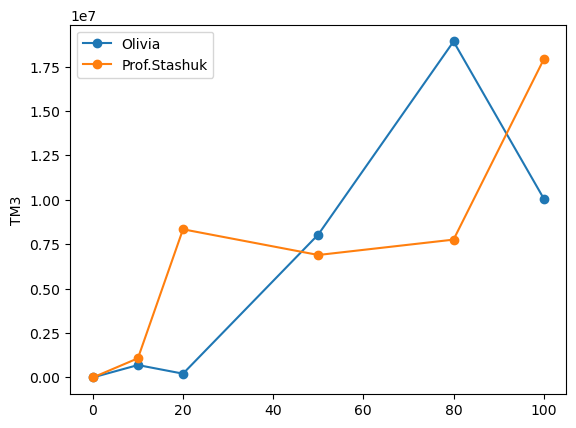

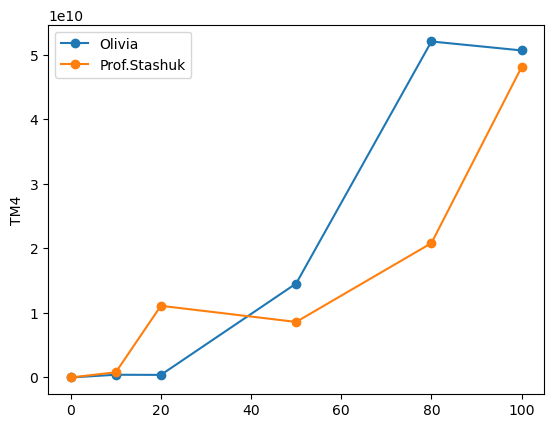

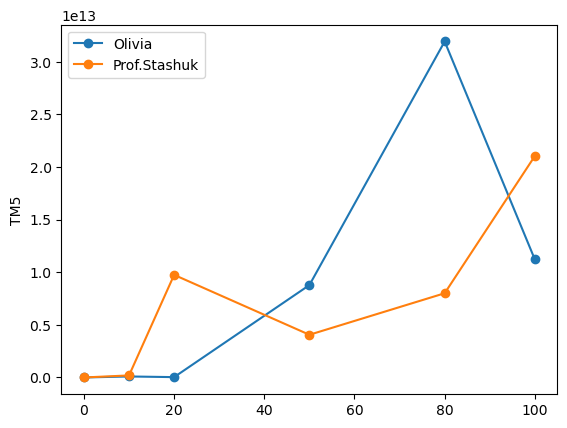

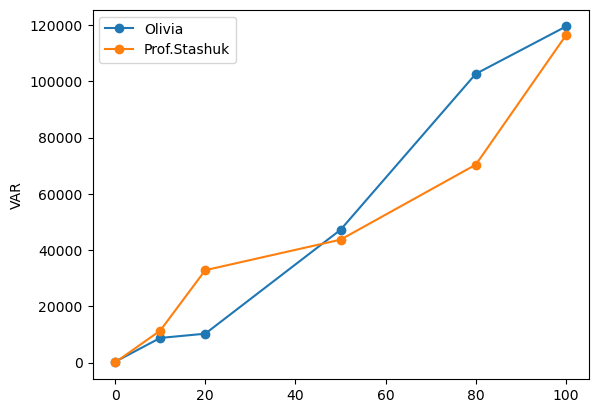

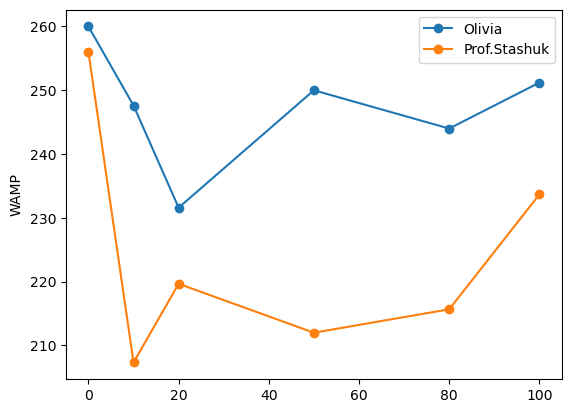

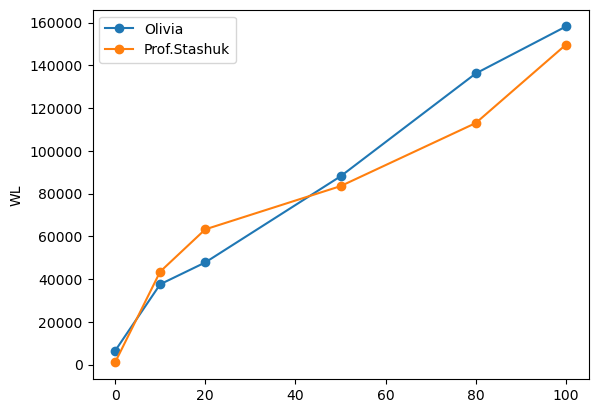

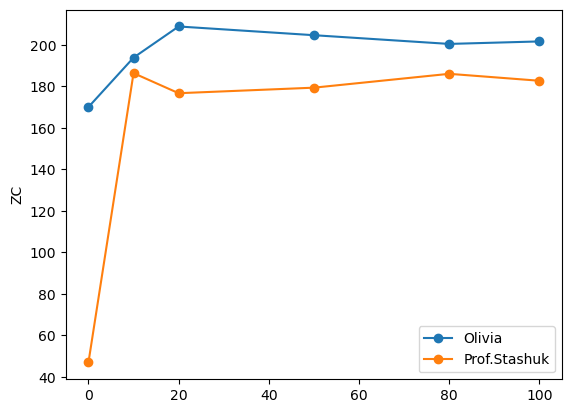

In [517]:
df_olivia = df_list[0]
df_stashuk = df_list[1]
cols = df_stashuk.columns.difference(['File'])
for col in cols: 
    plt.figure()
    # print(len(data[col].tolist()))
    plt.plot(mvc_perc, df_olivia[col].tolist(), marker='o', label='Olivia') 
    plt.plot(mvc_perc, df_stashuk[col].tolist(), marker='o', label='Prof.Stashuk') 
    plt.ylabel(col)
    plt.legend()
    plt.show()

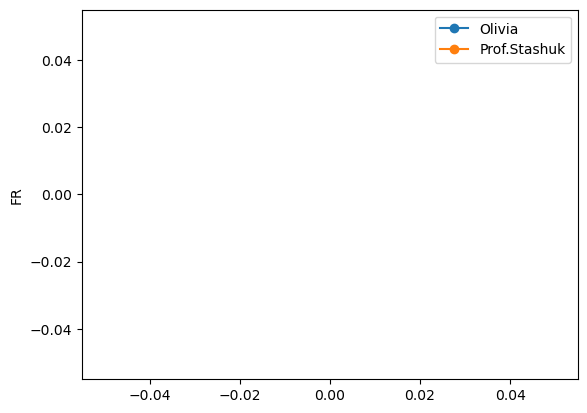

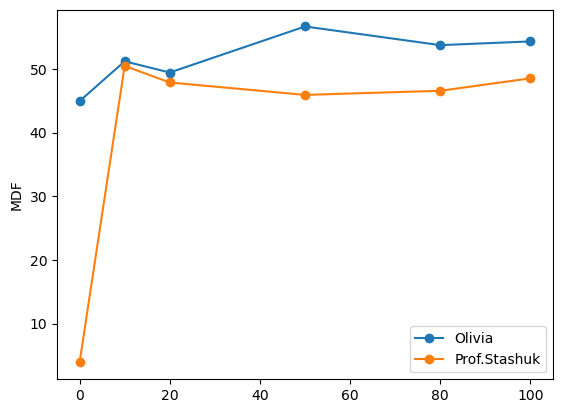

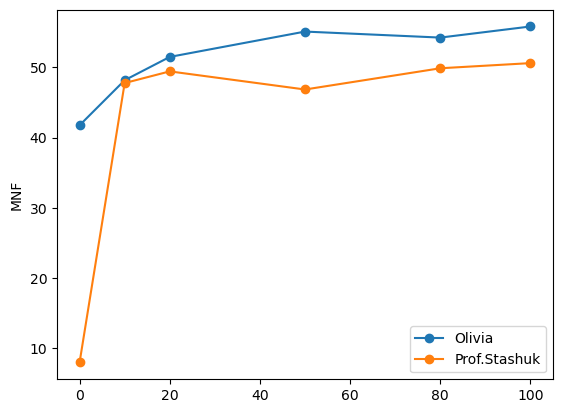

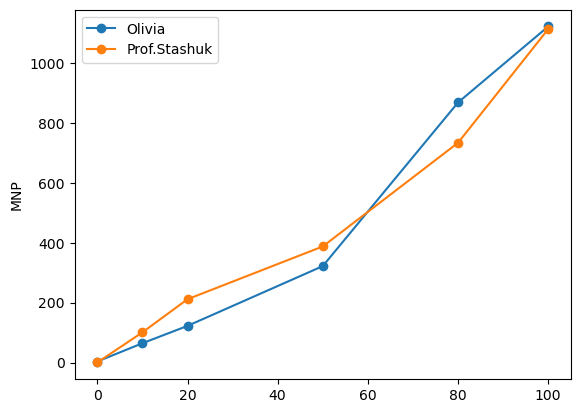

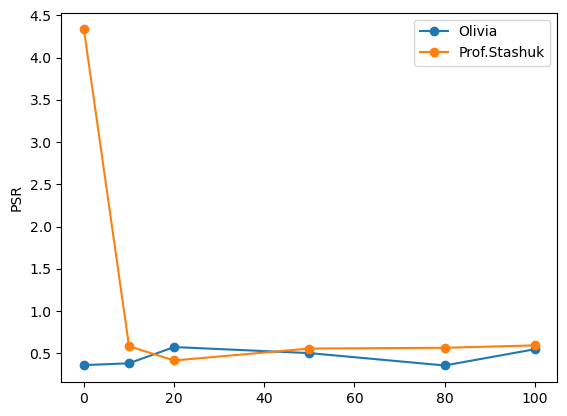

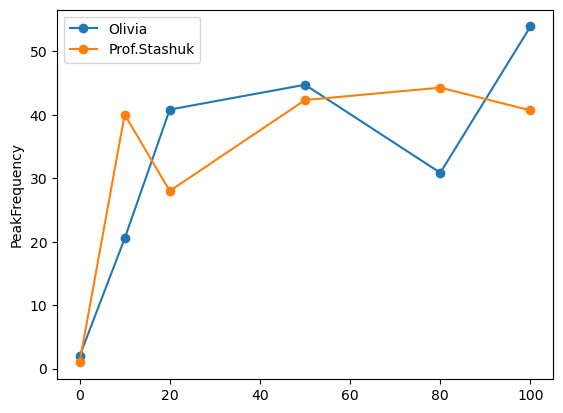

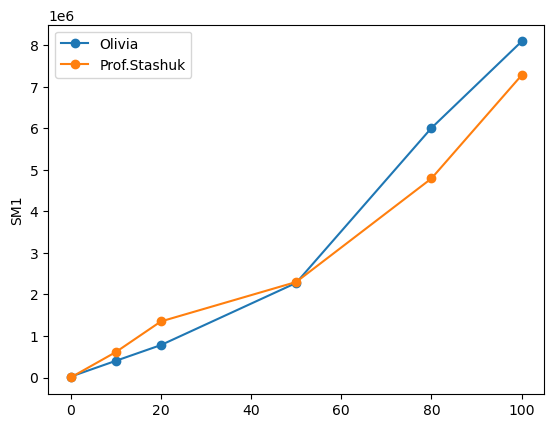

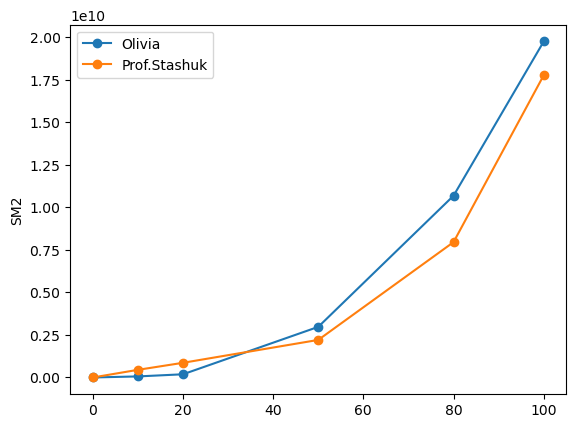

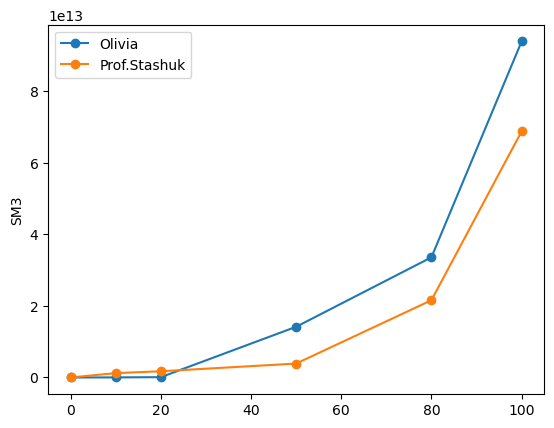

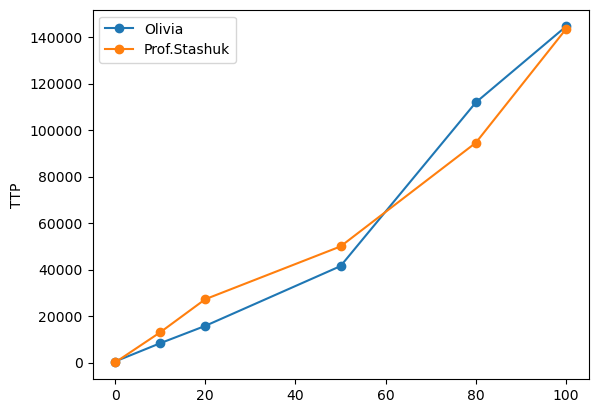

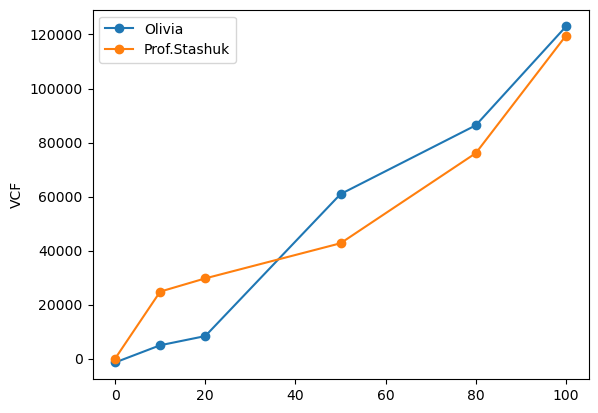

In [518]:
df_olivia = df_list[2]
df_stashuk = df_list[3]
cols = df_stashuk.columns.difference(['File'])
for col in cols: 
    plt.figure()
    # print(len(data[col].tolist()))
    plt.plot(mvc_perc, df_olivia[col].tolist(), marker='o', label='Olivia') 
    plt.plot(mvc_perc, df_stashuk[col].tolist(), marker='o', label='Prof.Stashuk') 
    plt.ylabel(col)
    plt.legend()
    plt.show()